In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import copy

font_path = "C:/Windows/Fonts/MALGUN.TTF"
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
plt.rc('xtick', labelsize=10)
mpl.rcParams['axes.unicode_minus'] = False

In [44]:
train = pd.read_csv("../../data/dacon_parking_demand_dataset/train.csv")
test = pd.read_csv("../../data/dacon_parking_demand_dataset/test.csv")
sub = pd.read_csv("../../data/dacon_parking_demand_dataset/test.csv")
age = pd.read_csv("../../data/dacon_parking_demand_dataset/age_gender_info.csv")

In [45]:
train.shape, test.shape

((2952, 15), (1022, 14))

In [46]:
# 오류1번 트레인 셋 처리
# 총세대수와 전용면적별 세대수 합이 다른 단지코드의 값을 -> 전용면적별세대수의 합으로 수정하기

def house_number_correction(df):
    error_1_group = df.groupby("단지코드")[["총세대수"]]
    total_number_house_hold = error_1_group.mean()

    error_2_group = df.groupby("단지코드")["전용면적별세대수"]
    sum_house_hold = error_2_group.sum()

    check_df = pd.concat([total_number_house_hold, sum_house_hold], axis=1)
    different_df = check_df[check_df["총세대수"] != check_df["전용면적별세대수"]]

    total_house_index = different_df.index
    total_house_number = []
    for v in different_df.values:
        total_house_number.append(v[1])
    
    for code, value in zip(total_house_index, total_house_number):
         df.loc[df["단지코드"] == code, "총세대수"] = value
    
    return df

train = house_number_correction(train)
test = house_number_correction(test)

In [47]:
error_1_group = train.groupby("단지코드")[["총세대수"]]
total_number_house_hold = error_1_group.mean()

error_2_group = train.groupby("단지코드")["전용면적별세대수"]
sum_house_hold = error_2_group.sum()

check_df = pd.concat([total_number_house_hold, sum_house_hold], axis=1)
check_df = check_df[check_df["총세대수"] != check_df["전용면적별세대수"]]

print(check_df.shape)
check_df

(0, 2)


,총세대수,전용면적별세대수
단지코드,,


In [48]:
error_1_group = test.groupby("단지코드")[["총세대수"]]
total_number_house_hold = error_1_group.mean()

error_2_group = test.groupby("단지코드")["전용면적별세대수"]
sum_house_hold = error_2_group.sum()

check_df = pd.concat([total_number_house_hold, sum_house_hold], axis=1)
check_df = check_df[check_df["총세대수"] != check_df["전용면적별세대수"]]

check_df.shape

(0, 2)

In [49]:
# 오류2번 3번 처리하기

train[(train["단지코드"] == "C2675") | (train["단지코드"] == "C2335") | (train["단지코드"] == "C1327")]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수


In [50]:
test[(test["단지코드"] == "C2675") | (test["단지코드"] == "C2335") | (test["단지코드"] == "C1327")].head(3)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
579,C2675,512,아파트,경기도,국민임대,36.65,130,9.0,A,18476000,154790,0.0,3.0,1016.0
580,C2675,512,아파트,경기도,국민임대,46.90,44,9.0,A,34082000,232200,0.0,3.0,1016.0
581,C2675,512,아파트,경기도,국민임대,46.90,80,9.0,A,34082000,232200,0.0,3.0,1016.0


In [51]:
# 테스트 데이터 셋에서 세개의 코드 데이터를 없애기 (2, 3번 3개 코드 제거)

error_index = test[(test["단지코드"] == "C2675") | (test["단지코드"] == "C2335") | (test["단지코드"] == "C1327")].index
test = test.drop(index=error_index, axis=0)

In [52]:
# 에러2번의 5개 단지코드 트레인 셋 제거

train_set_error_index = train[(train["단지코드"] =="C2085") | (train["단지코드"] =="C1397") | (train["단지코드"] =="C2431") | (train["단지코드"] =="C1649") | (train["단지코드"] =="C1036")].index
train = train.drop(index=train_set_error_index, axis=0)

In [53]:
# 에러3번의 트레인 셋 7개 단지 코드 제거

train_set_error_index = train[(train["단지코드"] =="C1095") | (train["단지코드"] =="C2051") | (train["단지코드"] =="C1218") | (train["단지코드"] =="C1894") | (train["단지코드"] =="C2483") | (train["단지코드"] =="C1502") | (train["단지코드"] =="C1988")].index
train = train.drop(index=train_set_error_index, axis=0)

In [54]:
# 자격 유형 피처 전처리

test.loc[196, "자격유형"] = "A"
test.loc[258, "자격유형"] = "C"
test.isnull().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           180
임대료                             180
도보 10분거리 내 지하철역 수(환승노선 수 반영)     38
도보 10분거리 내 버스정류장 수                0
단지내주차면수                           0
dtype: int64

In [55]:
train.isnull().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           569
임대료                             569
도보 10분거리 내 지하철역 수(환승노선 수 반영)    207
도보 10분거리 내 버스정류장 수                0
단지내주차면수                           0
등록차량수                             0
dtype: int64

In [56]:
# 임대보증금 피처 전처리
# 임대보증금이 0인 행의 데이터를 -> 트레인 셋의 중앙값으로 치환
train_df = train.copy(deep=True)
test_df = test.copy(deep=True)

train_df["임대보증금"] = train_df["임대보증금"].fillna(0)
train_df.loc[train_df["임대보증금"] == "-", "임대보증금"] = 0
train_df["임대보증금"] = train_df["임대보증금"].astype(int)
train_df.loc[train_df["임대보증금"] == 0, "임대보증금"] = train_df["임대보증금"].median()

test_df["임대보증금"] = test_df["임대보증금"].fillna(0)
test_df.loc[test_df["임대보증금"] == "-", "임대보증금"] = 0
test_df["임대보증금"] = test_df["임대보증금"].astype(int)
test_df.loc[test_df["임대보증금"] == 0, "임대보증금"] = train_df["임대보증금"].median()

<AxesSubplot:>

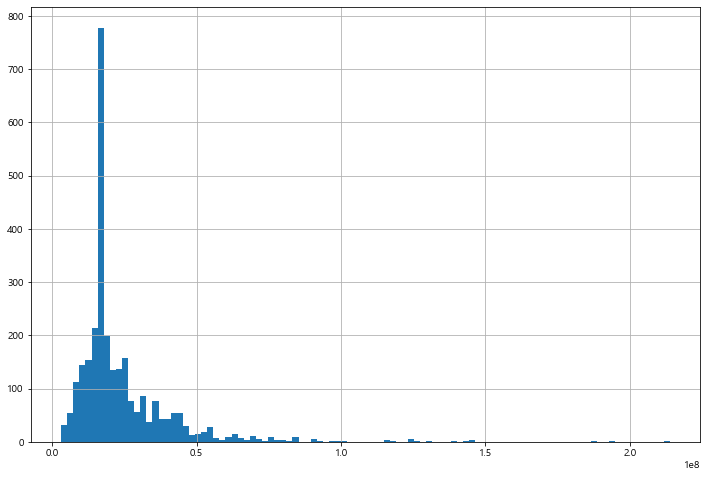

In [57]:
train_df["임대보증금"].hist(bins=100, figsize=(12, 8))

In [58]:
train_df["임대보증금"].value_counts()

17342000.0    597
24775000.0     22
14418000.0     21
5787000.0      18
18726000.0     17
             ... 
11270000.0      1
13158000.0      1
28252000.0      1
27044000.0      1
34499000.0      1
Name: 임대보증금, Length: 925, dtype: int64

In [59]:
train_df["임대보증금"].skew()

3.7105256603522703

In [60]:
train_df["임대보증금"].kurt()

22.901982730916558

In [61]:
# 레이블 인코딩인데, 원핫 인코딩으로 바꿔보기

qualification_type_feature = pd.get_dummies(train_df["자격유형"])
train_df = pd.concat([train_df, qualification_type_feature], axis=1)

qualification_type_feature = pd.get_dummies(test_df["자격유형"])
test_df = pd.concat([test_df, qualification_type_feature], axis=1)

test_df["B"] = 0
test_df["F"] = 0
test_df["O"] = 0

In [62]:
train_df.shape, test_df.shape

((2869, 30), (1008, 29))

In [63]:
# 실거주 세대수 피처 생성

train_df["실거주세대수"] = train_df["총세대수"] - train_df["공가수"].astype(int)
test_df["실거주세대수"] = test_df["총세대수"] - test_df["공가수"].astype(int)

In [64]:
# 세대수 별 주차면수 피처 생성

train_df["세대수비율주차면수"] = (train_df["전용면적별세대수"] / train_df["실거주세대수"]) * train_df["단지내주차면수"]
test_df["세대수비율주차면수"] = (test_df["전용면적별세대수"] / test_df["실거주세대수"]) * test_df["단지내주차면수"]

In [65]:
# 버스정류장 피처 전처리
# 최빈값인 2로 채우기

train_df["도보 10분거리 내 버스정류장 수"] = train_df["도보 10분거리 내 버스정류장 수"].fillna(2)
test_df["도보 10분거리 내 버스정류장 수"] = test_df["도보 10분거리 내 버스정류장 수"].fillna(2)

In [66]:
# 전철역 피처 전처리
# Null 값 0으로 채우기

train_df["도보 10분거리 내 지하철역 수(환승노선 수 반영)"] = train_df["도보 10분거리 내 지하철역 수(환승노선 수 반영)"].fillna(0)
test_df["도보 10분거리 내 지하철역 수(환승노선 수 반영)"] = test_df["도보 10분거리 내 지하철역 수(환승노선 수 반영)"].fillna(0)

<AxesSubplot:>

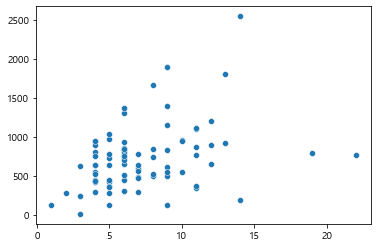

In [67]:
area_group = train_df.groupby("지역")["등록차량수"]

values = area_group.get_group("경기도").value_counts().index
counts = area_group.get_group("경기도").value_counts().values

sns.scatterplot(x=counts, y=values)

In [68]:
# 지역별 인구수 컬럼 추가

# population_df = pd.read_csv("../data/dacon_parking_demand_dataset/age_gender_info.csv")
# partial_population_df = population_df[["20대(남자)", "40대(남자)", "50대(여자)", "지역"]]
# train_df = pd.merge(train_df, partial_population_df, on="지역")
# test_df = pd.merge(test_df, partial_population_df, on="지역")

# train_df.columns

In [69]:
# 지역 피처 원핫 인코딩

area_df = pd.get_dummies(train_df["지역"])
area_df = area_df.drop("서울특별시", axis=1)
train_df = pd.concat([train_df, area_df], axis=1)

area_df = pd.get_dummies(test_df["지역"])
test_df = pd.concat([test_df, area_df], axis=1)

In [70]:
train_df[train_df["단지코드"] == "C1039"]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,대구광역시,대전광역시,부산광역시,세종특별자치시,울산광역시,전라남도,전라북도,제주특별자치도,충청남도,충청북도
2100,C1039,790,아파트,서울특별시,장기전세,51.32,126,13.0,A,187694000.0,...,0,0,0,0,0,0,0,0,0,0
2101,C1039,790,아파트,서울특별시,장기전세,59.88,49,13.0,A,213863000.0,...,0,0,0,0,0,0,0,0,0,0
2102,C1039,790,아파트,서울특별시,장기전세,59.94,75,13.0,A,213863000.0,...,0,0,0,0,0,0,0,0,0,0
2103,C1039,790,아파트,서울특별시,국민임대,26.68,26,13.0,A,15282000.0,...,0,0,0,0,0,0,0,0,0,0
2104,C1039,790,아파트,서울특별시,국민임대,36.70,140,13.0,A,21024000.0,...,0,0,0,0,0,0,0,0,0,0
2105,C1039,790,아파트,서울특별시,국민임대,36.70,14,13.0,A,21024000.0,...,0,0,0,0,0,0,0,0,0,0
2106,C1039,790,아파트,서울특별시,국민임대,36.87,43,13.0,A,21024000.0,...,0,0,0,0,0,0,0,0,0,0
2107,C1039,790,아파트,서울특별시,국민임대,46.76,192,13.0,A,45456000.0,...,0,0,0,0,0,0,0,0,0,0
2108,C1039,790,아파트,서울특별시,국민임대,46.96,25,13.0,A,45456000.0,...,0,0,0,0,0,0,0,0,0,0
2109,C1039,790,아파트,서울특별시,영구임대,26.68,70,13.0,I,11490000.0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
# 임대건물 구분 피처 전처리 (아파트, 상가 원핫 인코딩)

train_df = pd.concat([train_df, pd.get_dummies(train_df["임대건물구분"])], axis=1)
train_df.drop("임대건물구분", axis=1, inplace=True)

test_df = pd.concat([test_df, pd.get_dummies(test_df["임대건물구분"])], axis=1)
test_df.drop("임대건물구분", axis=1, inplace=True)

In [72]:
# 전용 면적 피처를 5의 배수로 전처리, 전후로 비교해서 (103.69 -> 102.80까지 떨어짐)
train_df["전용면적"] = train_df["전용면적"] // 5*5
test_df["전용면적"] = test_df["전용면적"] // 5*5

In [73]:
# 세대수 규모 당 총 전용 면적 피처 생성

train_df["세대수 규모 당 총 전용면적"] = train_df["전용면적"] * train_df["전용면적별세대수"]
test_df["세대수 규모 당 총 전용면적"] = test_df["전용면적"] * test_df["전용면적별세대수"]

In [74]:
# 단지별 총 전용 면적 피처 생성

train_df["단지별 총 전용면적"] = train_df.groupby("단지코드")["세대수 규모 당 총 전용면적"].transform(np.sum)
test_df["단지별 총 전용면적"] = test_df.groupby("단지코드")["세대수 규모 당 총 전용면적"].transform(np.sum)

In [75]:
# 전용면적 당 차량등록수 피처 생성

train_df["전용면적 당 차량등록수"] = (train_df["세대수 규모 당 총 전용면적"] / train_df["단지별 총 전용면적"]) * train_df["등록차량수"]

In [76]:
train_df["공급유형"].value_counts()

국민임대         1727
임대상가          562
행복주택          202
공공임대(10년)     175
영구임대          152
공공임대(50년)      31
공공임대(분납)        7
공공분양            7
장기전세            3
공공임대(5년)        3
Name: 공급유형, dtype: int64

In [77]:
train_df[train_df["공급유형"] == "장기전세"]

,단지코드,총세대수,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,...,전라남도,전라북도,제주특별자치도,충청남도,충청북도,상가,아파트,세대수 규모 당 총 전용면적,단지별 총 전용면적,전용면적 당 차량등록수
2100,C1039,790,서울특별시,장기전세,50.0,126,13.0,A,187694000.0,-,...,0,0,0,0,0,0,1,6300.0,33080.0,122.838573
2101,C1039,790,서울특별시,장기전세,55.0,49,13.0,A,213863000.0,-,...,0,0,0,0,0,0,1,2695.0,33080.0,52.547612
2102,C1039,790,서울특별시,장기전세,55.0,75,13.0,A,213863000.0,-,...,0,0,0,0,0,0,1,4125.0,33080.0,80.430018


In [78]:
test_df["공급유형"].value_counts() # 테스트 셋에는 없는 공급유형 -> 공공분양, 공공임대(5년), 장기전세

국민임대         614
임대상가         177
행복주택         120
영구임대          43
공공임대(10년)     35
공공임대(50년)     13
공공임대(분납)       6
Name: 공급유형, dtype: int64

In [79]:
supply_qualification_df = pd.get_dummies(train_df["공급유형"])
train_df = pd.concat([train_df, supply_qualification_df], axis=1)

supply_qualification_df = pd.get_dummies(test_df["공급유형"])
test_df = pd.concat([test_df, supply_qualification_df], axis=1)
test_df["공공임대(5년)"] = 0
test_df["공공분양"] = 0
test_df["장기전세"] = 0

In [80]:
train_df.columns

Index(['단지코드', '총세대수', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수', '자격유형',
       '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수',
       '단지내주차면수', '등록차량수', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
       'K', 'L', 'M', 'N', 'O', '실거주세대수', '세대수비율주차면수', '강원도', '경기도', '경상남도',
       '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시', '세종특별자치시', '울산광역시', '전라남도',
       '전라북도', '제주특별자치도', '충청남도', '충청북도', '상가', '아파트', '세대수 규모 당 총 전용면적',
       '단지별 총 전용면적', '전용면적 당 차량등록수', '공공분양', '공공임대(10년)', '공공임대(50년)',
       '공공임대(5년)', '공공임대(분납)', '국민임대', '영구임대', '임대상가', '장기전세', '행복주택'],
      dtype='object')

In [81]:
test_df.columns

Index(['단지코드', '총세대수', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수', '자격유형',
       '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수',
       '단지내주차면수', 'A', 'C', 'D', 'E', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
       'B', 'F', 'O', '실거주세대수', '세대수비율주차면수', '강원도', '경기도', '경상남도', '경상북도',
       '광주광역시', '대구광역시', '대전광역시', '부산광역시', '세종특별자치시', '울산광역시', '전라남도', '전라북도',
       '제주특별자치도', '충청남도', '충청북도', '상가', '아파트', '세대수 규모 당 총 전용면적', '단지별 총 전용면적',
       '공공임대(10년)', '공공임대(50년)', '공공임대(분납)', '국민임대', '영구임대', '임대상가', '행복주택',
       '공공임대(5년)', '공공분양', '장기전세'],
      dtype='object')

In [82]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2869 entries, 8 to 2951
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2869 non-null   object 
 1   총세대수                          2869 non-null   int64  
 2   지역                            2869 non-null   object 
 3   공급유형                          2869 non-null   object 
 4   전용면적                          2869 non-null   float64
 5   전용면적별세대수                      2869 non-null   int64  
 6   공가수                           2869 non-null   float64
 7   자격유형                          2869 non-null   object 
 8   임대보증금                         2869 non-null   float64
 9   임대료                           2300 non-null   object 
 10  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2869 non-null   float64
 11  도보 10분거리 내 버스정류장 수            2869 non-null   float64
 12  단지내주차면수                       2869 non-null   float64
 13  등록차

### 전처리한 피처들의 선형성 검증 이변량 분석

<AxesSubplot:xlabel='임대보증금', ylabel='전용면적 당 차량등록수'>

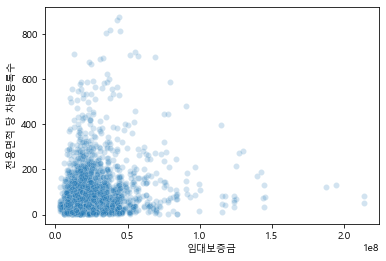

In [83]:
sns.scatterplot(data=train_df, x="임대보증금", y="전용면적 당 차량등록수", alpha=0.2)

<AxesSubplot:xlabel='전용면적별세대수', ylabel='전용면적 당 차량등록수'>

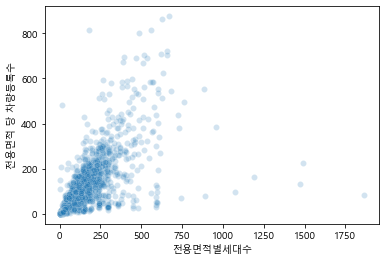

In [84]:
sns.scatterplot(data=train_df, x="전용면적별세대수", y="전용면적 당 차량등록수", alpha=0.2)

In [85]:
# 503, 1871, 1951, 1977, 2023

outlier_index = train_df[train_df["전용면적별세대수"] >= 1000].index
train_df = train_df.drop(index=outlier_index, axis=0)

In [86]:
outlier_index = train_df[(train_df["전용면적별세대수"] <= 30) & (train_df["전용면적 당 차량등록수"] >=400)].index
train_df = train_df.drop(index=outlier_index, axis=0)

In [87]:
# 301 아웃라이어 제거

train_df[(train_df["전용면적별세대수"] > 150) & (train_df["전용면적 당 차량등록수"] > 750)]

train_df = train_df.drop(index=301, axis=0)

<AxesSubplot:xlabel='전용면적별세대수', ylabel='Count'>

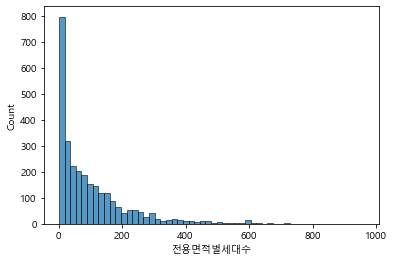

In [88]:
sns.histplot(train_df["전용면적별세대수"])

<AxesSubplot:xlabel='세대수 규모 당 총 전용면적', ylabel='전용면적 당 차량등록수'>

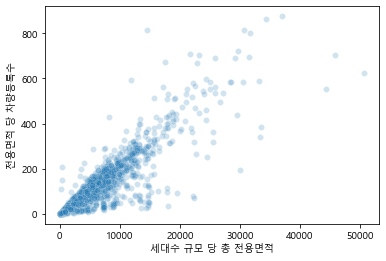

In [89]:
sns.scatterplot(data=train_df, x="세대수 규모 당 총 전용면적", y="전용면적 당 차량등록수", alpha=0.2)

In [90]:
# 1974, 2141, 2532

outlier_index = train_df[train_df["세대수 규모 당 총 전용면적"] > 40000].index

train_df = train_df.drop(index=outlier_index, axis=0)

<AxesSubplot:xlabel='세대수 규모 당 총 전용면적', ylabel='Count'>

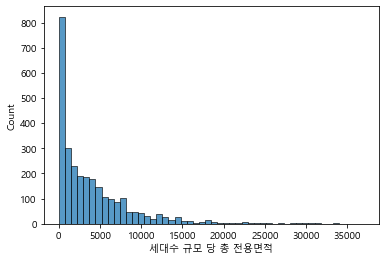

In [91]:
sns.histplot(train_df["세대수 규모 당 총 전용면적"])

<AxesSubplot:xlabel='실거주세대수', ylabel='전용면적 당 차량등록수'>

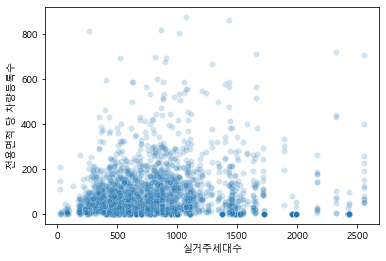

In [92]:
sns.scatterplot(data=train_df, x="실거주세대수", y="전용면적 당 차량등록수", alpha=0.2)

<AxesSubplot:xlabel='실거주세대수', ylabel='Count'>

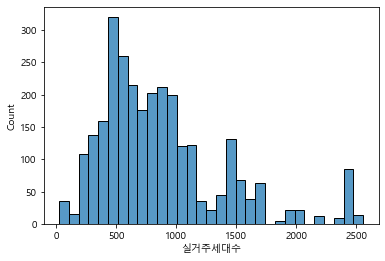

In [93]:
sns.histplot(train_df["실거주세대수"])

<AxesSubplot:xlabel='단지별 총 전용면적', ylabel='전용면적 당 차량등록수'>

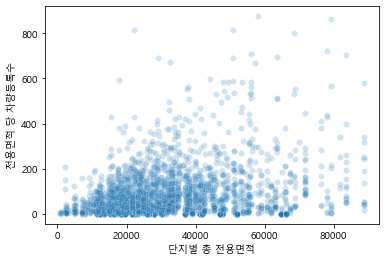

In [94]:
sns.scatterplot(data=train_df, x="단지별 총 전용면적", y="전용면적 당 차량등록수", alpha=0.2)

<AxesSubplot:xlabel='단지별 총 전용면적', ylabel='Count'>

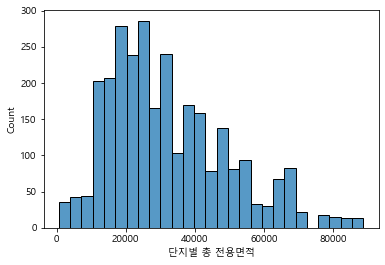

In [95]:
sns.histplot(train_df["단지별 총 전용면적"])

<AxesSubplot:xlabel='임대보증금', ylabel='전용면적 당 차량등록수'>

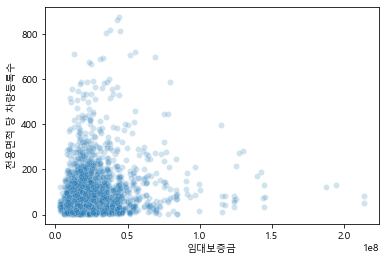

In [96]:
sns.scatterplot(data=train_df, x="임대보증금", y="전용면적 당 차량등록수", alpha=0.2)

In [97]:
# 임대보증금 아웃라이어 2111, 2812, 2813, 2814 제거

outlier_index = train_df[train_df["임대보증금"] >= 187694000].index
train_df = train_df.drop(index=outlier_index, axis=0)

<AxesSubplot:xlabel='도보 10분거리 내 버스정류장 수', ylabel='전용면적 당 차량등록수'>

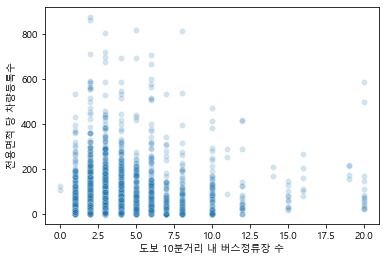

In [98]:
sns.scatterplot(data=train_df, x="도보 10분거리 내 버스정류장 수", y="전용면적 당 차량등록수", alpha=0.2)

<AxesSubplot:xlabel='도보 10분거리 내 버스정류장 수', ylabel='Count'>

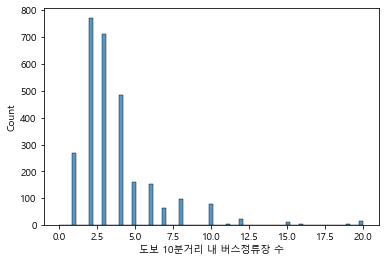

In [99]:
sns.histplot(train_df["도보 10분거리 내 버스정류장 수"])

<AxesSubplot:xlabel='도보 10분거리 내 지하철역 수(환승노선 수 반영)', ylabel='전용면적 당 차량등록수'>

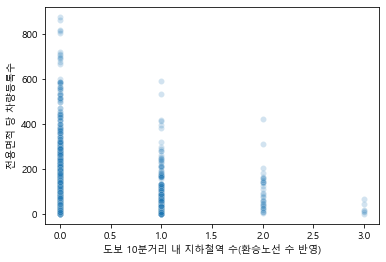

In [100]:
sns.scatterplot(data=train_df, x="도보 10분거리 내 지하철역 수(환승노선 수 반영)", y="전용면적 당 차량등록수", alpha=0.2)

<AxesSubplot:xlabel='도보 10분거리 내 지하철역 수(환승노선 수 반영)', ylabel='Count'>

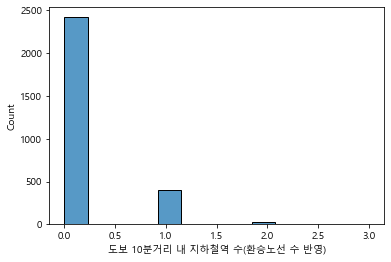

In [101]:
sns.histplot(train_df["도보 10분거리 내 지하철역 수(환승노선 수 반영)"])

<AxesSubplot:xlabel='상가', ylabel='전용면적 당 차량등록수'>

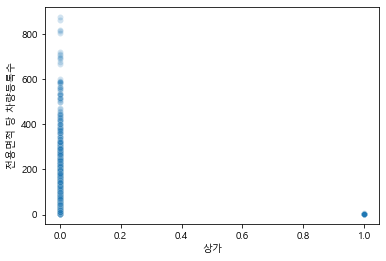

In [102]:
sns.scatterplot(data=train_df, x="상가", y="전용면적 당 차량등록수", alpha=0.2)

<AxesSubplot:xlabel='전용면적 당 차량등록수', ylabel='Count'>

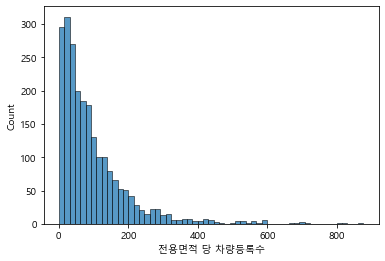

In [103]:
sns.histplot(train_df[train_df["상가"] == 0]["전용면적 당 차량등록수"])

<AxesSubplot:xlabel='전용면적 당 차량등록수', ylabel='Count'>

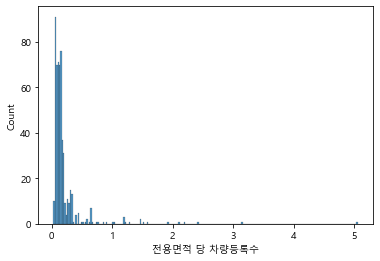

In [104]:
sns.histplot(train_df[train_df["상가"] == 1]["전용면적 당 차량등록수"])

<AxesSubplot:xlabel='전용면적 당 차량등록수', ylabel='Count'>

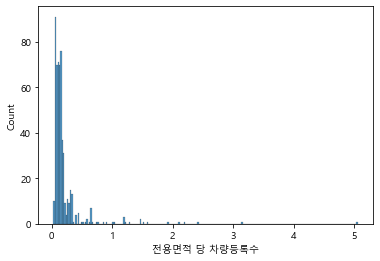

In [105]:
sns.histplot(train_df[train_df["아파트"] == 0]["전용면적 당 차량등록수"])

<AxesSubplot:xlabel='전용면적 당 차량등록수', ylabel='Count'>

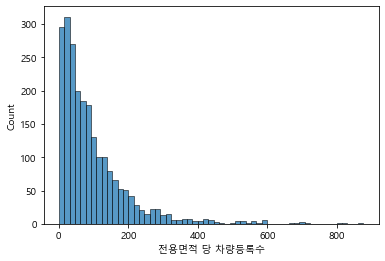

In [106]:
sns.histplot(train_df[train_df["아파트"] == 1]["전용면적 당 차량등록수"])

<AxesSubplot:xlabel='전용면적 당 차량등록수', ylabel='Count'>

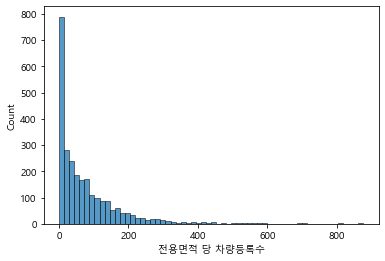

In [107]:
sns.histplot(train_df[train_df["강원도"] == 0]["전용면적 당 차량등록수"])

<AxesSubplot:xlabel='자격유형', ylabel='전용면적 당 차량등록수'>

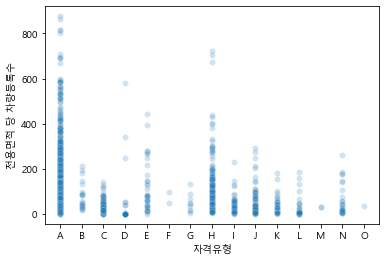

In [108]:
sns.scatterplot(data=train_df, x="자격유형", y="전용면적 당 차량등록수", alpha=0.2)

<AxesSubplot:xlabel='지역', ylabel='전용면적 당 차량등록수'>

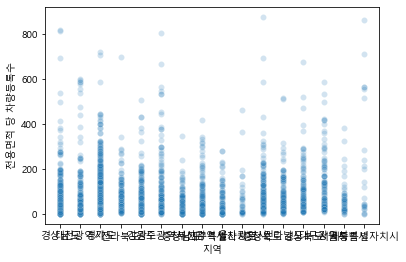

In [109]:
sns.scatterplot(data=train_df, x="지역", y="전용면적 당 차량등록수", alpha=0.2)

<AxesSubplot:xlabel='세대수비율주차면수', ylabel='전용면적 당 차량등록수'>

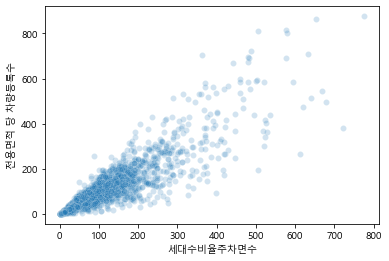

In [110]:
sns.scatterplot(data=train_df, x="세대수비율주차면수", y="전용면적 당 차량등록수", alpha=0.2)

In [111]:
# 세대수비율주차면수 아웃라이어 제거 314

outlier_index = train_df[(train_df["세대수비율주차면수"] >= 700) & (train_df["전용면적 당 차량등록수"] < 400)].index
train_df = train_df.drop(index=outlier_index, axis=0)

<AxesSubplot:>

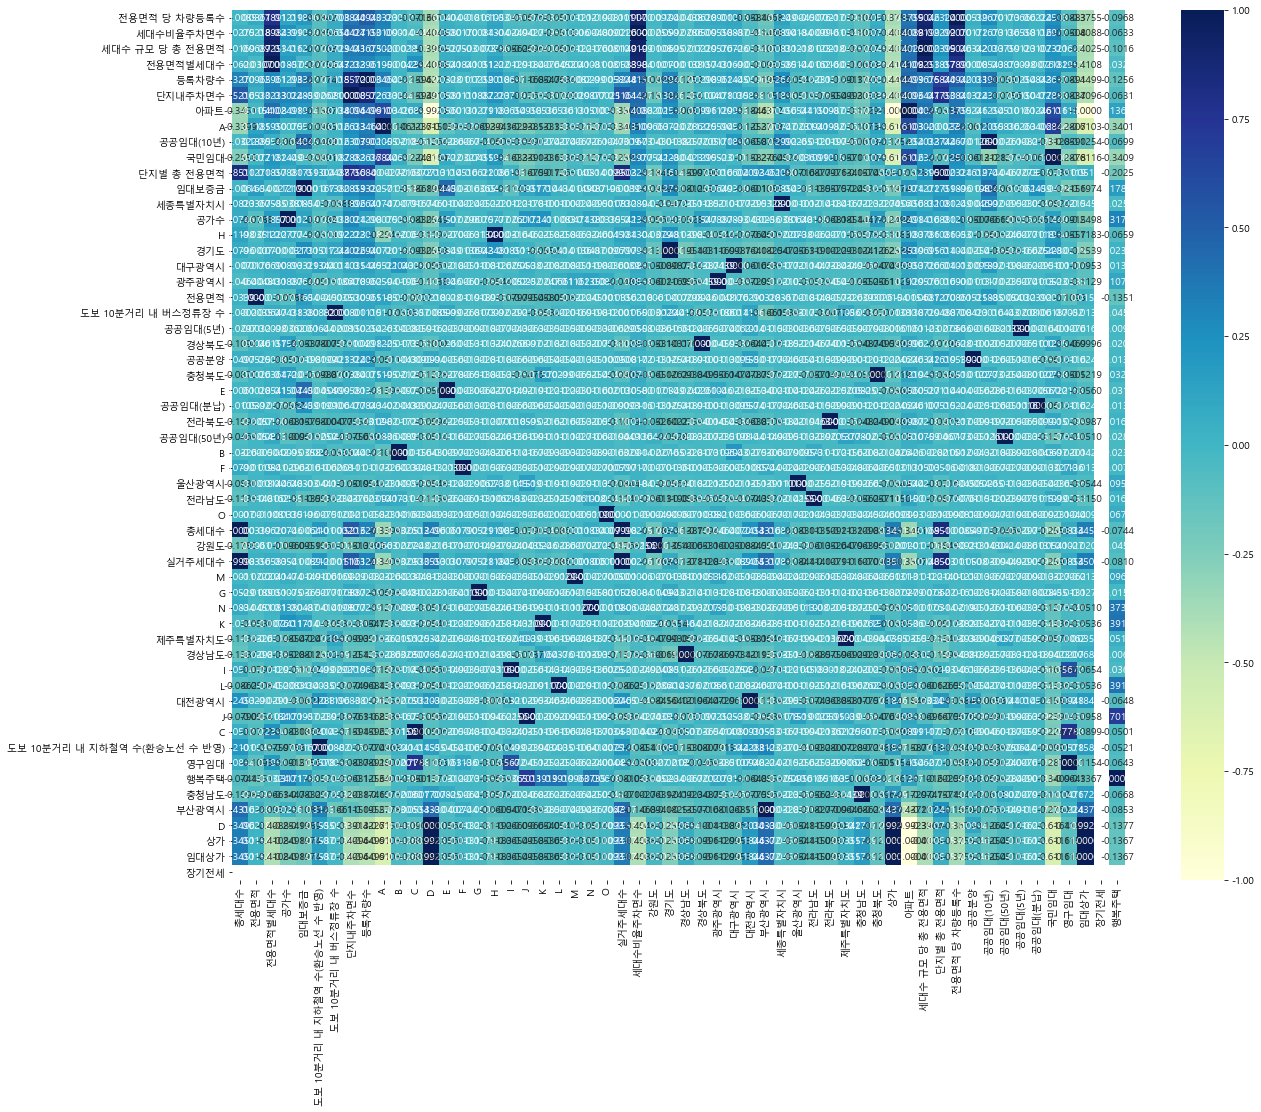

In [112]:
correlation_df = train_df.corr().sort_values(by="전용면적 당 차량등록수", ascending=False)

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_df, annot=True, fmt=".4f", cmap='YlGnBu')

In [113]:
correlation_df

,총세대수,전용면적,전용면적별세대수,공가수,임대보증금,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,A,...,공공분양,공공임대(10년),공공임대(50년),공공임대(5년),공공임대(분납),국민임대,영구임대,임대상가,장기전세,행복주택
전용면적 당 차량등록수,-0.008533,0.086054,0.789069,0.121870,0.189562,-0.084184,0.070765,0.384005,0.493973,0.332329,...,0.053883,0.266957,0.017333,0.066608,0.022382,0.250349,-0.088255,-0.375536,NaN,-0.096768
세대수비율주차면수,0.027472,0.021849,0.898431,0.239892,0.103922,-0.085429,0.064952,0.442654,0.415033,0.310859,...,0.017160,0.167297,0.013636,0.055847,0.011636,0.297702,-0.050803,-0.408829,NaN,-0.063255
세대수 규모 당 총 전용면적,0.016870,0.068713,0.925335,0.141603,0.127195,-0.076317,0.072934,0.344077,0.367491,0.302032,...,0.034181,0.203279,0.075896,0.012340,0.010665,0.232106,0.062740,-0.402512,NaN,-0.101567
전용면적별세대수,0.062013,-0.030675,1.000000,0.185720,-0.002710,-0.075917,0.064737,0.323313,0.296089,0.195018,...,0.000841,0.054284,0.087283,0.009768,-0.007566,0.218229,0.195092,-0.410776,NaN,-0.032354
등록차량수,0.327042,0.096542,0.296089,0.129783,0.332218,-0.077352,0.111463,0.857204,1.000000,0.346411,...,0.203075,0.390067,-0.059064,0.025368,0.084339,0.263739,-0.089065,-0.449912,NaN,-0.125648
단지내주차면수,0.521607,0.052993,0.323313,0.302376,0.285947,-0.026177,0.079991,1.000000,0.857204,0.263348,...,0.132360,0.230656,-0.075575,0.014964,0.047712,0.288324,-0.083749,-0.409617,NaN,-0.063084
아파트,-0.345064,-0.015352,0.410776,0.249805,0.197355,-0.158689,0.013776,0.409617,0.449912,0.610290,...,0.024554,0.125399,0.051037,0.016063,0.024554,0.611632,0.115392,-1.000000,NaN,0.136663
A,-0.339916,0.118514,0.195018,0.007473,0.057060,-0.096454,0.011556,0.263348,0.346411,1.000000,...,-0.061113,0.205475,0.083628,0.026320,0.040233,0.684438,-0.280724,-0.610290,NaN,-0.340145
공공임대(10년),-0.032233,0.188488,0.054284,-0.066621,0.404513,-0.048931,0.001646,0.230656,0.390067,0.205475,...,-0.012557,1.000000,-0.026101,-0.008215,-0.012557,-0.312798,-0.059013,-0.125399,NaN,-0.069891
국민임대,-0.255778,0.007655,0.218229,0.144856,-0.042894,-0.099070,0.018739,0.288324,0.263739,0.684438,...,-0.061247,-0.312798,-0.127309,-0.040067,-0.061247,1.000000,-0.287835,-0.611632,NaN,-0.340893


In [227]:
# X_train & X_test 셋 선택

# ["상가", "등록차량수", "단지내주차면수", "단지별 총 전용면적", "실거주세대수", "지역", "공급유형", "전용면적", "자격유형", "임대료",
#  "전용면적 당 차량등록수", "총세대수"]

X_train_df_sel = train_df.drop(["단지코드", "상가", "등록차량수", "단지내주차면수", "단지별 총 전용면적", "실거주세대수", "지역", "공급유형", "전용면적", "자격유형", "임대료",
 "전용면적 당 차량등록수", "총세대수"], axis=1)

X_test_df_sel = test_df.drop(["단지코드", "상가", "단지내주차면수", "단지별 총 전용면적", "실거주세대수", "지역", "공급유형", "전용면적", "자격유형", "임대료",
 "총세대수"], axis=1)

y_train_df = train_df["전용면적 당 차량등록수"]

In [228]:
X_train_df_sel.columns

Index(['전용면적별세대수', '공가수', '임대보증금', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
       'K', 'L', 'M', 'N', 'O', '세대수비율주차면수', '강원도', '경기도', '경상남도', '경상북도',
       '광주광역시', '대구광역시', '대전광역시', '부산광역시', '세종특별자치시', '울산광역시', '전라남도', '전라북도',
       '제주특별자치도', '충청남도', '충청북도', '아파트', '세대수 규모 당 총 전용면적', '공공분양',
       '공공임대(10년)', '공공임대(50년)', '공공임대(5년)', '공공임대(분납)', '국민임대', '영구임대',
       '임대상가', '장기전세', '행복주택'],
      dtype='object')

In [229]:
column_names = ['전용면적별세대수', '공가수', '임대보증금', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
       'K', 'L', 'M', 'N', 'O', '세대수비율주차면수', '강원도', '경기도', '경상남도', '경상북도',
       '광주광역시', '대구광역시', '대전광역시', '부산광역시', '세종특별자치시', '울산광역시', '전라남도', '전라북도',
       '제주특별자치도', '충청남도', '충청북도', '아파트', '세대수 규모 당 총 전용면적', '공공분양',
       '공공임대(10년)', '공공임대(50년)', '공공임대(5년)', '공공임대(분납)', '국민임대', '영구임대',
       '임대상가', '장기전세', '행복주택']

X_test_df_sel = X_test_df_sel.reindex(columns=column_names)
X_test_df_sel.columns

Index(['전용면적별세대수', '공가수', '임대보증금', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
       'K', 'L', 'M', 'N', 'O', '세대수비율주차면수', '강원도', '경기도', '경상남도', '경상북도',
       '광주광역시', '대구광역시', '대전광역시', '부산광역시', '세종특별자치시', '울산광역시', '전라남도', '전라북도',
       '제주특별자치도', '충청남도', '충청북도', '아파트', '세대수 규모 당 총 전용면적', '공공분양',
       '공공임대(10년)', '공공임대(50년)', '공공임대(5년)', '공공임대(분납)', '국민임대', '영구임대',
       '임대상가', '장기전세', '행복주택'],
      dtype='object')

In [230]:
X_train_df_sel

,전용면적별세대수,공가수,임대보증금,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,A,B,C,D,E,...,공공분양,공공임대(10년),공공임대(50년),공공임대(5년),공공임대(분납),국민임대,영구임대,임대상가,장기전세,행복주택
8,276,17.0,9216000.0,0.0,3.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9,60,17.0,12672000.0,0.0,3.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10,20,17.0,12672000.0,0.0,3.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
11,38,17.0,18433000.0,0.0,3.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
12,19,17.0,18433000.0,0.0,3.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947,19,7.0,11346000.0,0.0,1.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2948,34,7.0,14005000.0,0.0,1.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2949,34,7.0,14005000.0,0.0,1.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2950,114,7.0,14005000.0,0.0,1.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [231]:
X_train_df_log = X_train_df_sel.apply(lambda x: np.log1p(x))
X_test_df_log = X_test_df_sel.apply(lambda x: np.log1p(x))
y_train_df_log = y_train_df.apply(lambda x: np.log1p(x))

### Linear Regression 모델 평가

In [232]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from catboost import Pool, CatBoostRegressor


In [233]:
X_train_df_log.shape, X_test_df_log.shape, y_train_df_log.shape

((2854, 48), (1008, 48), (2854,))

In [234]:
params = {"alpha": [0.001, 0.01, 0.02, 0.03, 0.05, 0.07, 0.9, 1, 1.1, 1.5, 2, 5, 10, 15, 20, 25, 30, 40, 50]}
ridge_model = Ridge()

grid_model = GridSearchCV(ridge_model, param_grid=params, cv=5, scoring="neg_mean_absolute_error")
grid_model.fit(X_train_df_log, y_train_df_log)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.02, 0.03, 0.05, 0.07, 0.9, 1,
                                   1.1, 1.5, 2, 5, 10, 15, 20, 25, 30, 40,
                                   50]},
             scoring='neg_mean_absolute_error')

In [235]:
grid_model.best_params_

{'alpha': 50}

In [236]:
best_ridge = grid_model.best_estimator_
best_ridge

Ridge(alpha=50)

In [237]:
X_train, X_test, y_train, y_test = train_test_split(X_train_df_log, y_train_df_log, test_size=0.25,
                                                    random_state=42)

pred = best_ridge.predict(X_test)
mean_absolute_error(np.expm1(y_test), np.expm1(pred))

15.003548262917912

In [238]:
ridge_model = Ridge(alpha=50)
ridge_model.fit(X_train_df_log, y_train_df_log)
pred = ridge_model.predict(X_test_df_log)
pred = np.expm1(pred)

result = pd.DataFrame(data=pred, columns=["전용면적 당 차량등록수"], index=test_df.index)
result["단지코드"] = test_df.loc[test_df.index, "단지코드"]

pred_group = result.groupby("단지코드")["전용면적 당 차량등록수"].sum()
final_pred = pd.Series(pred_group)
final_pred = final_pred.reset_index(drop=False)

sub_df = sub.merge(final_pred, how="left")
sub_df = sub_df.drop_duplicates(["단지코드"], keep="first").reset_index()
sub_df = sub_df[["단지코드", "전용면적 당 차량등록수"]]
sub_df = sub_df.rename(columns={"단지코드":"code", "전용면적 당 차량등록수": "num"})
# sub_df.to_csv("ridge_with_이상치처리_다중공선성피처제거_0722.csv", index=False)

sub_df

,code,num
0,C1072,696.299801
1,C1128,1183.481482
2,C1456,549.538565
3,C1840,487.507486
4,C1332,1128.528124
...,...,...
145,C2456,225.387045
146,C1266,414.303311
147,C2152,34.237148
148,C1267,319.976525


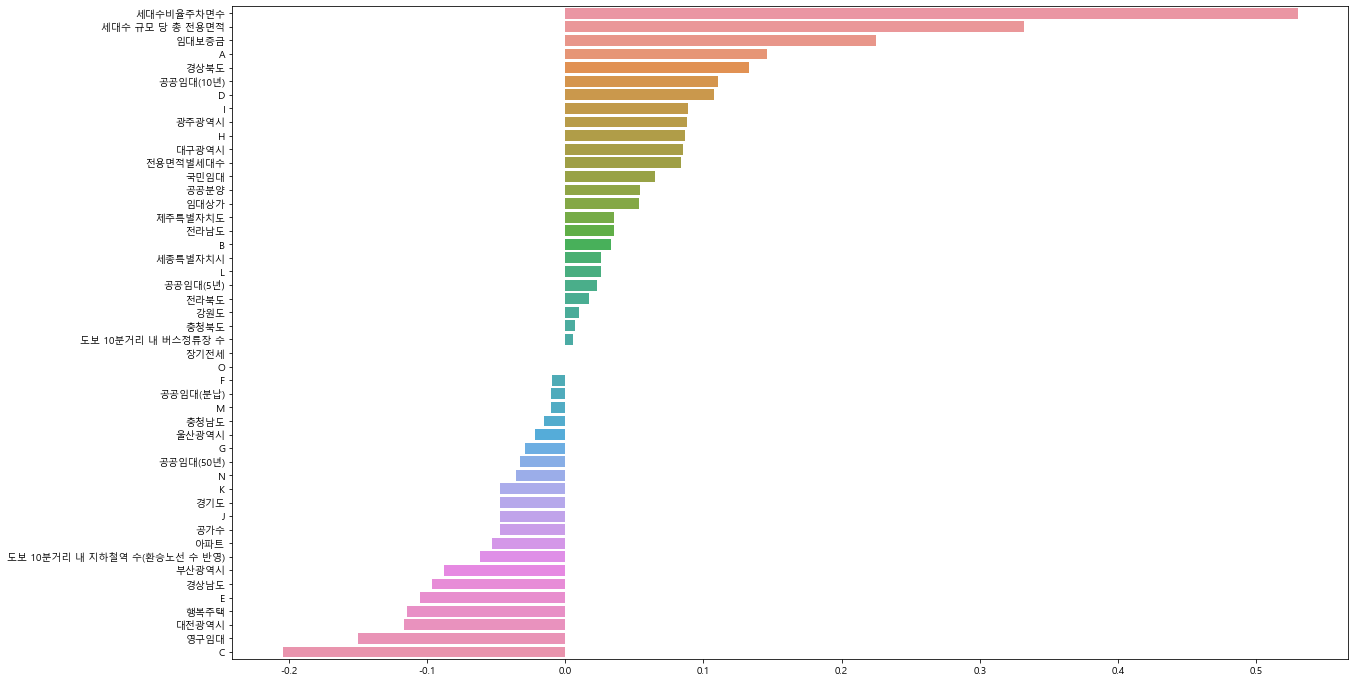

In [239]:
importance = ridge_model.coef_
feature_importance = pd.Series(data=importance, index=X_train_df_log.columns)
feature_importance = feature_importance.sort_values(ascending=False)

plt.figure(figsize=(20, 12))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.show()

In [240]:
cat_reg = CatBoostRegressor()

cat_reg.fit(X_train, y_train)
pred = cat_reg.predict(X_test)

mean_absolute_error(np.expm1(y_test), np.expm1(pred))

Learning rate set to 0.04469
0:	learn: 1.7666917	total: 1.42ms	remaining: 1.42s
1:	learn: 1.6950191	total: 2.69ms	remaining: 1.34s
2:	learn: 1.6283989	total: 3.87ms	remaining: 1.29s
3:	learn: 1.5620360	total: 5.06ms	remaining: 1.26s
4:	learn: 1.5009704	total: 5.78ms	remaining: 1.15s
5:	learn: 1.4396684	total: 6.97ms	remaining: 1.16s
6:	learn: 1.3820343	total: 8.16ms	remaining: 1.16s
7:	learn: 1.3299117	total: 9.33ms	remaining: 1.16s
8:	learn: 1.2761076	total: 10.5ms	remaining: 1.16s
9:	learn: 1.2264392	total: 11.7ms	remaining: 1.16s
10:	learn: 1.1800306	total: 13.1ms	remaining: 1.18s
11:	learn: 1.1347342	total: 14.5ms	remaining: 1.19s
12:	learn: 1.0912097	total: 15.9ms	remaining: 1.21s
13:	learn: 1.0503138	total: 17.1ms	remaining: 1.2s
14:	learn: 1.0114717	total: 17.8ms	remaining: 1.17s
15:	learn: 0.9727587	total: 19ms	remaining: 1.17s
16:	learn: 0.9373148	total: 19.9ms	remaining: 1.15s
17:	learn: 0.9024341	total: 21.1ms	remaining: 1.15s
18:	learn: 0.8706700	total: 22.4ms	remaining: 1.

261:	learn: 0.1872840	total: 322ms	remaining: 907ms
262:	learn: 0.1870987	total: 323ms	remaining: 906ms
263:	learn: 0.1869746	total: 325ms	remaining: 905ms
264:	learn: 0.1866670	total: 326ms	remaining: 903ms
265:	learn: 0.1863707	total: 327ms	remaining: 902ms
266:	learn: 0.1862288	total: 328ms	remaining: 901ms
267:	learn: 0.1859532	total: 329ms	remaining: 900ms
268:	learn: 0.1856758	total: 331ms	remaining: 898ms
269:	learn: 0.1856281	total: 332ms	remaining: 897ms
270:	learn: 0.1853801	total: 333ms	remaining: 895ms
271:	learn: 0.1851656	total: 334ms	remaining: 894ms
272:	learn: 0.1848882	total: 335ms	remaining: 893ms
273:	learn: 0.1845829	total: 337ms	remaining: 892ms
274:	learn: 0.1843232	total: 338ms	remaining: 891ms
275:	learn: 0.1839975	total: 339ms	remaining: 890ms
276:	learn: 0.1839515	total: 340ms	remaining: 888ms
277:	learn: 0.1837615	total: 342ms	remaining: 887ms
278:	learn: 0.1836184	total: 343ms	remaining: 886ms
279:	learn: 0.1833236	total: 344ms	remaining: 885ms
280:	learn: 

537:	learn: 0.1398497	total: 658ms	remaining: 565ms
538:	learn: 0.1396926	total: 659ms	remaining: 564ms
539:	learn: 0.1396089	total: 660ms	remaining: 562ms
540:	learn: 0.1394600	total: 661ms	remaining: 561ms
541:	learn: 0.1393465	total: 662ms	remaining: 560ms
542:	learn: 0.1392410	total: 664ms	remaining: 559ms
543:	learn: 0.1391520	total: 665ms	remaining: 557ms
544:	learn: 0.1390128	total: 666ms	remaining: 556ms
545:	learn: 0.1389067	total: 667ms	remaining: 555ms
546:	learn: 0.1387626	total: 669ms	remaining: 554ms
547:	learn: 0.1386464	total: 670ms	remaining: 552ms
548:	learn: 0.1384842	total: 671ms	remaining: 551ms
549:	learn: 0.1382636	total: 672ms	remaining: 550ms
550:	learn: 0.1381976	total: 674ms	remaining: 549ms
551:	learn: 0.1380931	total: 675ms	remaining: 548ms
552:	learn: 0.1379949	total: 676ms	remaining: 547ms
553:	learn: 0.1379577	total: 677ms	remaining: 545ms
554:	learn: 0.1378844	total: 679ms	remaining: 544ms
555:	learn: 0.1377344	total: 680ms	remaining: 543ms
556:	learn: 

807:	learn: 0.1121321	total: 992ms	remaining: 236ms
808:	learn: 0.1120407	total: 994ms	remaining: 235ms
809:	learn: 0.1118820	total: 995ms	remaining: 233ms
810:	learn: 0.1118029	total: 996ms	remaining: 232ms
811:	learn: 0.1117482	total: 998ms	remaining: 231ms
812:	learn: 0.1116611	total: 999ms	remaining: 230ms
813:	learn: 0.1115447	total: 1s	remaining: 229ms
814:	learn: 0.1114904	total: 1s	remaining: 227ms
815:	learn: 0.1113474	total: 1s	remaining: 226ms
816:	learn: 0.1112967	total: 1s	remaining: 225ms
817:	learn: 0.1112447	total: 1s	remaining: 224ms
818:	learn: 0.1111302	total: 1.01s	remaining: 222ms
819:	learn: 0.1110298	total: 1.01s	remaining: 221ms
820:	learn: 0.1109181	total: 1.01s	remaining: 220ms
821:	learn: 0.1108290	total: 1.01s	remaining: 219ms
822:	learn: 0.1107444	total: 1.01s	remaining: 217ms
823:	learn: 0.1106737	total: 1.01s	remaining: 216ms
824:	learn: 0.1106198	total: 1.01s	remaining: 215ms
825:	learn: 0.1105450	total: 1.01s	remaining: 214ms
826:	learn: 0.1105050	total

9.285420907508124

In [251]:
# 릿지 0.5 & LGBM 0.5 조합 -> 12.3456 Score: 93.5424 (인구데이터 추가)
# 릿지 1.0 -> 14.9751 Score: 95.6543 (인구데이터 X)

# 릿지 0.9 & CatBoost 0.1 조합 -> 14.18295
# 릿지 0.8 & CatBoost 0.2 조합 -> 13.4380
# 릿지 0.7 & CatBoost 0.3 조합 -> 12.7728
# 릿지 0.6 & CatBoost 0.4 조합 -> 12.1470
# 릿지 0.5 & CatBoost 0.5 조합 -> 11.6074

# 릿지 alpha=50, 값으로 예측!!! 결과
# 릿지 0.5 & CatBoost 0.5 조합 -> 11.6044
# 릿지 0.4 & CatBoost 0.6 조합 -> 11.0139
# 릿지 0.3 & CatBoost 0.7 조합 -> 10.5106

ridge_model = Ridge(alpha=50)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)

cat_reg = CatBoostRegressor(random_seed=42)
cat_reg.fit(X_train, y_train)
cat_pred = cat_reg.predict(X_test)

final_pred = (ridge_pred * 0.4) + (cat_pred * 0.6)
mean_absolute_error(np.expm1(y_test), np.expm1(final_pred))

Learning rate set to 0.04469
0:	learn: 1.7650840	total: 1.69ms	remaining: 1.69s
1:	learn: 1.6928251	total: 3.17ms	remaining: 1.58s
2:	learn: 1.6255223	total: 4.85ms	remaining: 1.61s
3:	learn: 1.5616210	total: 6.16ms	remaining: 1.53s
4:	learn: 1.4980537	total: 7.53ms	remaining: 1.5s
5:	learn: 1.4379769	total: 8.88ms	remaining: 1.47s
6:	learn: 1.3808125	total: 10.3ms	remaining: 1.46s
7:	learn: 1.3252826	total: 11.7ms	remaining: 1.45s
8:	learn: 1.2739808	total: 13.1ms	remaining: 1.44s
9:	learn: 1.2245349	total: 14.4ms	remaining: 1.42s
10:	learn: 1.1783917	total: 15.7ms	remaining: 1.41s
11:	learn: 1.1355329	total: 17ms	remaining: 1.4s
12:	learn: 1.0916342	total: 18.4ms	remaining: 1.4s
13:	learn: 1.0512124	total: 19.8ms	remaining: 1.4s
14:	learn: 1.0105397	total: 21.3ms	remaining: 1.4s
15:	learn: 0.9717309	total: 22.6ms	remaining: 1.39s
16:	learn: 0.9349537	total: 23.9ms	remaining: 1.38s
17:	learn: 0.8999545	total: 25.3ms	remaining: 1.38s
18:	learn: 0.8665862	total: 26.8ms	remaining: 1.39s


261:	learn: 0.1886055	total: 331ms	remaining: 933ms
262:	learn: 0.1883918	total: 332ms	remaining: 931ms
263:	learn: 0.1881738	total: 334ms	remaining: 930ms
264:	learn: 0.1879417	total: 335ms	remaining: 929ms
265:	learn: 0.1877763	total: 336ms	remaining: 927ms
266:	learn: 0.1875884	total: 337ms	remaining: 926ms
267:	learn: 0.1873605	total: 338ms	remaining: 924ms
268:	learn: 0.1871000	total: 340ms	remaining: 923ms
269:	learn: 0.1870169	total: 341ms	remaining: 922ms
270:	learn: 0.1865866	total: 342ms	remaining: 920ms
271:	learn: 0.1865304	total: 344ms	remaining: 920ms
272:	learn: 0.1862486	total: 345ms	remaining: 918ms
273:	learn: 0.1860650	total: 346ms	remaining: 917ms
274:	learn: 0.1859854	total: 347ms	remaining: 915ms
275:	learn: 0.1859263	total: 348ms	remaining: 914ms
276:	learn: 0.1856515	total: 350ms	remaining: 913ms
277:	learn: 0.1854300	total: 351ms	remaining: 911ms
278:	learn: 0.1853249	total: 352ms	remaining: 910ms
279:	learn: 0.1850452	total: 353ms	remaining: 908ms
280:	learn: 

545:	learn: 0.1411986	total: 670ms	remaining: 557ms
546:	learn: 0.1411509	total: 671ms	remaining: 556ms
547:	learn: 0.1409776	total: 672ms	remaining: 554ms
548:	learn: 0.1408856	total: 673ms	remaining: 553ms
549:	learn: 0.1407278	total: 675ms	remaining: 552ms
550:	learn: 0.1405613	total: 676ms	remaining: 551ms
551:	learn: 0.1404325	total: 677ms	remaining: 550ms
552:	learn: 0.1404174	total: 678ms	remaining: 548ms
553:	learn: 0.1401981	total: 680ms	remaining: 547ms
554:	learn: 0.1401848	total: 681ms	remaining: 546ms
555:	learn: 0.1400520	total: 682ms	remaining: 545ms
556:	learn: 0.1400342	total: 683ms	remaining: 544ms
557:	learn: 0.1398785	total: 685ms	remaining: 542ms
558:	learn: 0.1397254	total: 686ms	remaining: 541ms
559:	learn: 0.1396305	total: 687ms	remaining: 540ms
560:	learn: 0.1395021	total: 689ms	remaining: 539ms
561:	learn: 0.1394090	total: 690ms	remaining: 538ms
562:	learn: 0.1392951	total: 691ms	remaining: 536ms
563:	learn: 0.1390503	total: 692ms	remaining: 535ms
564:	learn: 

816:	learn: 0.1110119	total: 1s	remaining: 225ms
817:	learn: 0.1109610	total: 1s	remaining: 224ms
818:	learn: 0.1109337	total: 1.01s	remaining: 223ms
819:	learn: 0.1108999	total: 1.01s	remaining: 221ms
820:	learn: 0.1108298	total: 1.01s	remaining: 220ms
821:	learn: 0.1106842	total: 1.01s	remaining: 219ms
822:	learn: 0.1106109	total: 1.01s	remaining: 218ms
823:	learn: 0.1104676	total: 1.01s	remaining: 216ms
824:	learn: 0.1103439	total: 1.01s	remaining: 215ms
825:	learn: 0.1102496	total: 1.01s	remaining: 214ms
826:	learn: 0.1102034	total: 1.02s	remaining: 213ms
827:	learn: 0.1101254	total: 1.02s	remaining: 212ms
828:	learn: 0.1101122	total: 1.02s	remaining: 210ms
829:	learn: 0.1100286	total: 1.02s	remaining: 209ms
830:	learn: 0.1099637	total: 1.02s	remaining: 208ms
831:	learn: 0.1099231	total: 1.02s	remaining: 207ms
832:	learn: 0.1097977	total: 1.02s	remaining: 205ms
833:	learn: 0.1097194	total: 1.03s	remaining: 204ms
834:	learn: 0.1096378	total: 1.03s	remaining: 203ms
835:	learn: 0.1094

11.013929624612096

In [242]:
# 릿지 (alpha=50) 0.5 & CatBoost 0.5 조합 -> 90.04546점

ridge_model = Ridge(alpha=50)
ridge_model.fit(X_train_df_log, y_train_df_log)
ridge_pred = ridge_model.predict(X_test_df_log)

cat_reg = CatBoostRegressor(random_seed=42)
cat_reg.fit(X_train_df_log, y_train_df_log)
cat_pred = cat_reg.predict(X_test_df_log)

final_pred = (ridge_pred * 0.5) + (cat_pred * 0.5)
final_pred = np.expm1(final_pred)

result = pd.DataFrame(data=final_pred, columns=["전용면적 당 차량등록수"], index=test_df.index)
result["단지코드"] = test_df.loc[test_df.index, "단지코드"]

pred_group = result.groupby("단지코드")["전용면적 당 차량등록수"].sum()
final_pred = pd.Series(pred_group)
final_pred = final_pred.reset_index(drop=False)

sub_df = sub.merge(final_pred, how="left")
sub_df = sub_df.drop_duplicates(["단지코드"], keep="first").reset_index()
sub_df = sub_df[["단지코드", "전용면적 당 차량등록수"]]
sub_df = sub_df.rename(columns={"단지코드":"code", "전용면적 당 차량등록수": "num"})
# sub_df.to_csv("ridge(0.5)&catboost(0.5)조합_공급유형추가_0726.csv", index=False)

sub_df

Learning rate set to 0.04704
0:	learn: 1.7673390	total: 1.76ms	remaining: 1.75s
1:	learn: 1.6929805	total: 3.38ms	remaining: 1.68s
2:	learn: 1.6214560	total: 4.82ms	remaining: 1.6s
3:	learn: 1.5523955	total: 6.26ms	remaining: 1.56s
4:	learn: 1.4865057	total: 7.72ms	remaining: 1.54s
5:	learn: 1.4232168	total: 9.23ms	remaining: 1.53s
6:	learn: 1.3629868	total: 10.9ms	remaining: 1.54s
7:	learn: 1.3084088	total: 11.7ms	remaining: 1.45s
8:	learn: 1.2547261	total: 13.1ms	remaining: 1.44s
9:	learn: 1.2052649	total: 14.5ms	remaining: 1.44s
10:	learn: 1.1561953	total: 16ms	remaining: 1.44s
11:	learn: 1.1089184	total: 17.4ms	remaining: 1.43s
12:	learn: 1.0671728	total: 18.4ms	remaining: 1.4s
13:	learn: 1.0248320	total: 19.9ms	remaining: 1.4s
14:	learn: 0.9843259	total: 21.8ms	remaining: 1.43s
15:	learn: 0.9460331	total: 23.1ms	remaining: 1.42s
16:	learn: 0.9102479	total: 24.5ms	remaining: 1.42s
17:	learn: 0.8764709	total: 26ms	remaining: 1.42s
18:	learn: 0.8420889	total: 27.4ms	remaining: 1.42s


240:	learn: 0.1984629	total: 326ms	remaining: 1.03s
241:	learn: 0.1981003	total: 327ms	remaining: 1.02s
242:	learn: 0.1977196	total: 329ms	remaining: 1.02s
243:	learn: 0.1976222	total: 330ms	remaining: 1.02s
244:	learn: 0.1972621	total: 331ms	remaining: 1.02s
245:	learn: 0.1969107	total: 333ms	remaining: 1.02s
246:	learn: 0.1967267	total: 334ms	remaining: 1.02s
247:	learn: 0.1964595	total: 335ms	remaining: 1.02s
248:	learn: 0.1962735	total: 337ms	remaining: 1.01s
249:	learn: 0.1959270	total: 338ms	remaining: 1.01s
250:	learn: 0.1957467	total: 339ms	remaining: 1.01s
251:	learn: 0.1955618	total: 341ms	remaining: 1.01s
252:	learn: 0.1953998	total: 342ms	remaining: 1.01s
253:	learn: 0.1950016	total: 343ms	remaining: 1.01s
254:	learn: 0.1948640	total: 345ms	remaining: 1.01s
255:	learn: 0.1945669	total: 346ms	remaining: 1s
256:	learn: 0.1941786	total: 347ms	remaining: 1s
257:	learn: 0.1938234	total: 349ms	remaining: 1s
258:	learn: 0.1937499	total: 350ms	remaining: 1s
259:	learn: 0.1934187	to

503:	learn: 0.1481704	total: 666ms	remaining: 655ms
504:	learn: 0.1480015	total: 667ms	remaining: 654ms
505:	learn: 0.1479302	total: 669ms	remaining: 653ms
506:	learn: 0.1478077	total: 670ms	remaining: 651ms
507:	learn: 0.1475962	total: 671ms	remaining: 650ms
508:	learn: 0.1474463	total: 673ms	remaining: 649ms
509:	learn: 0.1472694	total: 674ms	remaining: 647ms
510:	learn: 0.1470152	total: 675ms	remaining: 646ms
511:	learn: 0.1468753	total: 677ms	remaining: 645ms
512:	learn: 0.1468042	total: 678ms	remaining: 644ms
513:	learn: 0.1467382	total: 679ms	remaining: 642ms
514:	learn: 0.1464944	total: 681ms	remaining: 641ms
515:	learn: 0.1463037	total: 682ms	remaining: 640ms
516:	learn: 0.1461648	total: 683ms	remaining: 638ms
517:	learn: 0.1460243	total: 685ms	remaining: 637ms
518:	learn: 0.1458567	total: 686ms	remaining: 636ms
519:	learn: 0.1457308	total: 687ms	remaining: 635ms
520:	learn: 0.1455947	total: 689ms	remaining: 633ms
521:	learn: 0.1454803	total: 690ms	remaining: 632ms
522:	learn: 

758:	learn: 0.1192277	total: 1s	remaining: 319ms
759:	learn: 0.1191625	total: 1s	remaining: 317ms
760:	learn: 0.1189523	total: 1.01s	remaining: 316ms
761:	learn: 0.1188278	total: 1.01s	remaining: 315ms
762:	learn: 0.1187320	total: 1.01s	remaining: 313ms
763:	learn: 0.1185735	total: 1.01s	remaining: 312ms
764:	learn: 0.1184554	total: 1.01s	remaining: 311ms
765:	learn: 0.1183895	total: 1.01s	remaining: 309ms
766:	learn: 0.1183415	total: 1.01s	remaining: 308ms
767:	learn: 0.1182623	total: 1.01s	remaining: 307ms
768:	learn: 0.1181324	total: 1.02s	remaining: 306ms
769:	learn: 0.1180524	total: 1.02s	remaining: 304ms
770:	learn: 0.1178880	total: 1.02s	remaining: 303ms
771:	learn: 0.1178125	total: 1.02s	remaining: 302ms
772:	learn: 0.1176996	total: 1.02s	remaining: 300ms
773:	learn: 0.1176448	total: 1.02s	remaining: 299ms
774:	learn: 0.1175202	total: 1.02s	remaining: 298ms
775:	learn: 0.1174213	total: 1.03s	remaining: 296ms
776:	learn: 0.1173710	total: 1.03s	remaining: 295ms
777:	learn: 0.1172

,code,num
0,C1072,716.080693
1,C1128,1305.634756
2,C1456,522.371231
3,C1840,468.945967
4,C1332,1173.684154
...,...,...
145,C2456,235.528682
146,C1266,404.124119
147,C2152,30.738957
148,C1267,322.230235


In [249]:
# 릿지 (alpha=50) 0.7 & CatBoost 0.3 조합 -> 92.33267, MAE -> 12.8686

ridge_model = Ridge(alpha=50)
ridge_model.fit(X_train_df_log, y_train_df_log)
ridge_pred = ridge_model.predict(X_test_df_log)

cat_reg = CatBoostRegressor(random_seed=42)
cat_reg.fit(X_train_df_log, y_train_df_log)
cat_pred = cat_reg.predict(X_test_df_log)

final_pred = (ridge_pred * 0.7) + (cat_pred * 0.3)
final_pred = np.expm1(final_pred)

result = pd.DataFrame(data=final_pred, columns=["전용면적 당 차량등록수"], index=test_df.index)
result["단지코드"] = test_df.loc[test_df.index, "단지코드"]

pred_group = result.groupby("단지코드")["전용면적 당 차량등록수"].sum()
final_pred = pd.Series(pred_group)
final_pred = final_pred.reset_index(drop=False)

sub_df = sub.merge(final_pred, how="left")
sub_df = sub_df.drop_duplicates(["단지코드"], keep="first").reset_index()
sub_df = sub_df[["단지코드", "전용면적 당 차량등록수"]]
sub_df = sub_df.rename(columns={"단지코드":"code", "전용면적 당 차량등록수": "num"})
sub_df.to_csv("ridge(0.7)&catboost(0.3)조합_공급유형추가_0726.csv", index=False)

sub_df

Learning rate set to 0.04704
0:	learn: 1.7673390	total: 1.67ms	remaining: 1.67s
1:	learn: 1.6929805	total: 3.15ms	remaining: 1.57s
2:	learn: 1.6214560	total: 4.53ms	remaining: 1.5s
3:	learn: 1.5523955	total: 5.87ms	remaining: 1.46s
4:	learn: 1.4865057	total: 7.31ms	remaining: 1.45s
5:	learn: 1.4232168	total: 8.76ms	remaining: 1.45s
6:	learn: 1.3629868	total: 10.3ms	remaining: 1.46s
7:	learn: 1.3084088	total: 11.2ms	remaining: 1.38s
8:	learn: 1.2547261	total: 12.7ms	remaining: 1.4s
9:	learn: 1.2052649	total: 14.1ms	remaining: 1.39s
10:	learn: 1.1561953	total: 15.4ms	remaining: 1.39s
11:	learn: 1.1089184	total: 16.8ms	remaining: 1.39s
12:	learn: 1.0671728	total: 17.9ms	remaining: 1.36s
13:	learn: 1.0248320	total: 19.3ms	remaining: 1.36s
14:	learn: 0.9843259	total: 20.8ms	remaining: 1.36s
15:	learn: 0.9460331	total: 22.2ms	remaining: 1.36s
16:	learn: 0.9102479	total: 23.6ms	remaining: 1.36s
17:	learn: 0.8764709	total: 25ms	remaining: 1.36s
18:	learn: 0.8420889	total: 26.4ms	remaining: 1.3

245:	learn: 0.1969107	total: 328ms	remaining: 1.01s
246:	learn: 0.1967267	total: 330ms	remaining: 1s
247:	learn: 0.1964595	total: 331ms	remaining: 1s
248:	learn: 0.1962735	total: 332ms	remaining: 1s
249:	learn: 0.1959270	total: 334ms	remaining: 1s
250:	learn: 0.1957467	total: 335ms	remaining: 1000ms
251:	learn: 0.1955618	total: 336ms	remaining: 998ms
252:	learn: 0.1953998	total: 338ms	remaining: 997ms
253:	learn: 0.1950016	total: 339ms	remaining: 996ms
254:	learn: 0.1948640	total: 340ms	remaining: 995ms
255:	learn: 0.1945669	total: 342ms	remaining: 993ms
256:	learn: 0.1941786	total: 343ms	remaining: 992ms
257:	learn: 0.1938234	total: 345ms	remaining: 991ms
258:	learn: 0.1937499	total: 346ms	remaining: 989ms
259:	learn: 0.1934187	total: 347ms	remaining: 988ms
260:	learn: 0.1931506	total: 348ms	remaining: 987ms
261:	learn: 0.1927955	total: 350ms	remaining: 985ms
262:	learn: 0.1924746	total: 351ms	remaining: 984ms
263:	learn: 0.1920226	total: 353ms	remaining: 983ms
264:	learn: 0.1915793	t

506:	learn: 0.1478077	total: 667ms	remaining: 649ms
507:	learn: 0.1475962	total: 668ms	remaining: 647ms
508:	learn: 0.1474463	total: 670ms	remaining: 646ms
509:	learn: 0.1472694	total: 671ms	remaining: 645ms
510:	learn: 0.1470152	total: 672ms	remaining: 643ms
511:	learn: 0.1468753	total: 674ms	remaining: 642ms
512:	learn: 0.1468042	total: 675ms	remaining: 641ms
513:	learn: 0.1467382	total: 676ms	remaining: 639ms
514:	learn: 0.1464944	total: 678ms	remaining: 638ms
515:	learn: 0.1463037	total: 679ms	remaining: 637ms
516:	learn: 0.1461648	total: 680ms	remaining: 636ms
517:	learn: 0.1460243	total: 682ms	remaining: 634ms
518:	learn: 0.1458567	total: 683ms	remaining: 633ms
519:	learn: 0.1457308	total: 684ms	remaining: 632ms
520:	learn: 0.1455947	total: 686ms	remaining: 631ms
521:	learn: 0.1454803	total: 687ms	remaining: 629ms
522:	learn: 0.1452369	total: 689ms	remaining: 628ms
523:	learn: 0.1451017	total: 690ms	remaining: 627ms
524:	learn: 0.1450038	total: 691ms	remaining: 625ms
525:	learn: 

755:	learn: 0.1195881	total: 1s	remaining: 324ms
756:	learn: 0.1194226	total: 1s	remaining: 323ms
757:	learn: 0.1192798	total: 1.01s	remaining: 321ms
758:	learn: 0.1192277	total: 1.01s	remaining: 320ms
759:	learn: 0.1191625	total: 1.01s	remaining: 319ms
760:	learn: 0.1189523	total: 1.01s	remaining: 317ms
761:	learn: 0.1188278	total: 1.01s	remaining: 316ms
762:	learn: 0.1187320	total: 1.01s	remaining: 315ms
763:	learn: 0.1185735	total: 1.01s	remaining: 313ms
764:	learn: 0.1184554	total: 1.02s	remaining: 312ms
765:	learn: 0.1183895	total: 1.02s	remaining: 311ms
766:	learn: 0.1183415	total: 1.02s	remaining: 309ms
767:	learn: 0.1182623	total: 1.02s	remaining: 308ms
768:	learn: 0.1181324	total: 1.02s	remaining: 307ms
769:	learn: 0.1180524	total: 1.02s	remaining: 306ms
770:	learn: 0.1178880	total: 1.02s	remaining: 304ms
771:	learn: 0.1178125	total: 1.03s	remaining: 303ms
772:	learn: 0.1176996	total: 1.03s	remaining: 302ms
773:	learn: 0.1176448	total: 1.03s	remaining: 300ms
774:	learn: 0.1175

,code,num
0,C1072,708.019094
1,C1128,1255.233308
2,C1456,533.037335
3,C1840,476.213833
4,C1332,1155.405352
...,...,...
145,C2456,231.409531
146,C1266,408.139422
147,C2152,32.095592
148,C1267,321.283527


In [243]:
cat_reg.feature_importances_

array([1.05662542e+01, 4.56432598e+00, 4.29903974e+00, 4.17867815e-01,
       1.88182845e+00, 8.16979334e-01, 1.51837003e-02, 1.43214276e+00,
       4.79157652e+00, 1.75124627e-01, 2.87201964e-03, 2.73037317e-02,
       6.42891647e-02, 6.72506627e-02, 1.45849293e-01, 2.81756853e-02,
       1.23805311e-02, 2.74357685e-03, 8.12658212e-03, 5.23788901e-05,
       2.96628336e+01, 5.47576593e-01, 5.75859195e-01, 6.69987211e-01,
       4.20606273e-01, 1.93136620e-01, 1.41930836e-01, 5.42263513e-01,
       3.03274794e-01, 2.21117672e-02, 4.32029425e-02, 1.25894114e-01,
       1.37568960e-01, 1.00296408e-01, 9.17459162e-02, 1.56495176e-01,
       6.82957870e+00, 2.60608730e+01, 5.76169635e-02, 4.75561807e-01,
       5.73061970e-02, 3.56645020e-02, 8.72417610e-04, 1.84042561e+00,
       1.00646534e+00, 3.78527211e-01, 0.00000000e+00, 2.02957542e-01])

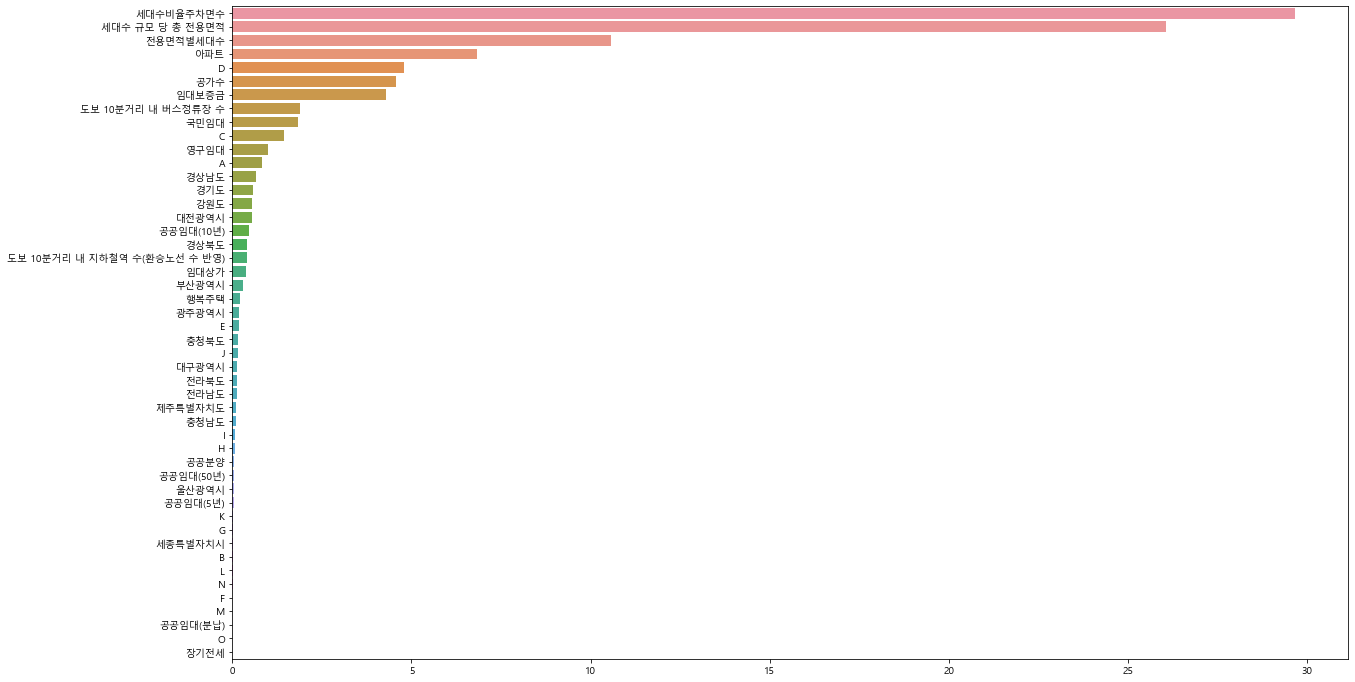

In [244]:
feature_importance = pd.Series(data=cat_reg.feature_importances_, index=cat_reg.feature_names_)
feature_importance = feature_importance.sort_values(ascending=False)

plt.figure(figsize=(20, 12))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.show()

In [245]:
# CatBoost 기본 모델만 이용해서 인구데이터 X 데이터셋으로 예측 -> 104점대

cat_pred_only = np.expm1(cat_pred)

result = pd.DataFrame(data=cat_pred_only, columns=["전용면적 당 차량등록수"], index=test_df.index)
result["단지코드"] = test_df.loc[test_df.index, "단지코드"]

pred_group = result.groupby("단지코드")["전용면적 당 차량등록수"].sum()
final_pred = pd.Series(pred_group)
final_pred = final_pred.reset_index(drop=False)

sub_df = sub.merge(final_pred, how="left")
sub_df = sub_df.drop_duplicates(["단지코드"], keep="first").reset_index()
sub_df = sub_df[["단지코드", "전용면적 당 차량등록수"]]
sub_df = sub_df.rename(columns={"단지코드":"code", "전용면적 당 차량등록수": "num"})
# sub_df.to_csv("catboost 기본 모델 100% 예측_0725.csv", index=False)

sub_df

,code,num
0,C1072,737.143914
1,C1128,1441.288803
2,C1456,496.822205
3,C1840,451.647073
4,C1332,1220.678308
...,...,...
145,C2456,246.205447
146,C1266,394.399463
147,C2152,27.579757
148,C1267,324.856086


In [252]:
# 릿지 (alpha=50) 0.4 & CatBoost 0.6 조합 -> 89.30275

ridge_model = Ridge(alpha=50)
ridge_model.fit(X_train_df_log, y_train_df_log)
ridge_pred = ridge_model.predict(X_test_df_log)

cat_reg = CatBoostRegressor(random_seed=42)
cat_reg.fit(X_train_df_log, y_train_df_log)
cat_pred = cat_reg.predict(X_test_df_log)

final_pred = (ridge_pred * 0.4) + (cat_pred * 0.6)
final_pred = np.expm1(final_pred)

result = pd.DataFrame(data=final_pred, columns=["전용면적 당 차량등록수"], index=test_df.index)
result["단지코드"] = test_df.loc[test_df.index, "단지코드"]

pred_group = result.groupby("단지코드")["전용면적 당 차량등록수"].sum()
final_pred = pd.Series(pred_group)
final_pred = final_pred.reset_index(drop=False)

sub_df = sub.merge(final_pred, how="left")
sub_df = sub_df.drop_duplicates(["단지코드"], keep="first").reset_index()
sub_df = sub_df[["단지코드", "전용면적 당 차량등록수"]]
sub_df = sub_df.rename(columns={"단지코드":"code", "전용면적 당 차량등록수": "num"})
sub_df.to_csv("ridge(0.4)&catboost(0.6)조합_공급유형추가_0726.csv", index=False)

sub_df

Learning rate set to 0.04704
0:	learn: 1.7673390	total: 1.94ms	remaining: 1.94s
1:	learn: 1.6929805	total: 3.58ms	remaining: 1.79s
2:	learn: 1.6214560	total: 5.44ms	remaining: 1.81s
3:	learn: 1.5523955	total: 6.96ms	remaining: 1.73s
4:	learn: 1.4865057	total: 8.47ms	remaining: 1.69s
5:	learn: 1.4232168	total: 10ms	remaining: 1.66s
6:	learn: 1.3629868	total: 11.5ms	remaining: 1.63s
7:	learn: 1.3084088	total: 12.4ms	remaining: 1.54s
8:	learn: 1.2547261	total: 13.9ms	remaining: 1.53s
9:	learn: 1.2052649	total: 15.3ms	remaining: 1.51s
10:	learn: 1.1561953	total: 16.8ms	remaining: 1.51s
11:	learn: 1.1089184	total: 18.2ms	remaining: 1.5s
12:	learn: 1.0671728	total: 19.2ms	remaining: 1.46s
13:	learn: 1.0248320	total: 20.6ms	remaining: 1.45s
14:	learn: 0.9843259	total: 22ms	remaining: 1.45s
15:	learn: 0.9460331	total: 23.4ms	remaining: 1.44s
16:	learn: 0.9102479	total: 24.9ms	remaining: 1.44s
17:	learn: 0.8764709	total: 26.2ms	remaining: 1.43s
18:	learn: 0.8420889	total: 27.5ms	remaining: 1.42

244:	learn: 0.1972621	total: 328ms	remaining: 1.01s
245:	learn: 0.1969107	total: 329ms	remaining: 1.01s
246:	learn: 0.1967267	total: 331ms	remaining: 1.01s
247:	learn: 0.1964595	total: 332ms	remaining: 1.01s
248:	learn: 0.1962735	total: 333ms	remaining: 1s
249:	learn: 0.1959270	total: 335ms	remaining: 1s
250:	learn: 0.1957467	total: 336ms	remaining: 1s
251:	learn: 0.1955618	total: 337ms	remaining: 1s
252:	learn: 0.1953998	total: 338ms	remaining: 999ms
253:	learn: 0.1950016	total: 340ms	remaining: 998ms
254:	learn: 0.1948640	total: 341ms	remaining: 997ms
255:	learn: 0.1945669	total: 342ms	remaining: 995ms
256:	learn: 0.1941786	total: 344ms	remaining: 994ms
257:	learn: 0.1938234	total: 345ms	remaining: 992ms
258:	learn: 0.1937499	total: 346ms	remaining: 991ms
259:	learn: 0.1934187	total: 348ms	remaining: 990ms
260:	learn: 0.1931506	total: 349ms	remaining: 988ms
261:	learn: 0.1927955	total: 350ms	remaining: 987ms
262:	learn: 0.1924746	total: 352ms	remaining: 985ms
263:	learn: 0.1920226	to

507:	learn: 0.1475962	total: 667ms	remaining: 646ms
508:	learn: 0.1474463	total: 669ms	remaining: 645ms
509:	learn: 0.1472694	total: 670ms	remaining: 644ms
510:	learn: 0.1470152	total: 671ms	remaining: 642ms
511:	learn: 0.1468753	total: 673ms	remaining: 641ms
512:	learn: 0.1468042	total: 674ms	remaining: 640ms
513:	learn: 0.1467382	total: 675ms	remaining: 639ms
514:	learn: 0.1464944	total: 677ms	remaining: 637ms
515:	learn: 0.1463037	total: 678ms	remaining: 636ms
516:	learn: 0.1461648	total: 680ms	remaining: 635ms
517:	learn: 0.1460243	total: 681ms	remaining: 634ms
518:	learn: 0.1458567	total: 682ms	remaining: 633ms
519:	learn: 0.1457308	total: 684ms	remaining: 631ms
520:	learn: 0.1455947	total: 685ms	remaining: 630ms
521:	learn: 0.1454803	total: 686ms	remaining: 629ms
522:	learn: 0.1452369	total: 688ms	remaining: 627ms
523:	learn: 0.1451017	total: 689ms	remaining: 626ms
524:	learn: 0.1450038	total: 691ms	remaining: 625ms
525:	learn: 0.1448744	total: 692ms	remaining: 623ms
526:	learn: 

760:	learn: 0.1189523	total: 1s	remaining: 315ms
761:	learn: 0.1188278	total: 1s	remaining: 314ms
762:	learn: 0.1187320	total: 1s	remaining: 312ms
763:	learn: 0.1185735	total: 1.01s	remaining: 311ms
764:	learn: 0.1184554	total: 1.01s	remaining: 310ms
765:	learn: 0.1183895	total: 1.01s	remaining: 308ms
766:	learn: 0.1183415	total: 1.01s	remaining: 307ms
767:	learn: 0.1182623	total: 1.01s	remaining: 306ms
768:	learn: 0.1181324	total: 1.01s	remaining: 305ms
769:	learn: 0.1180524	total: 1.01s	remaining: 303ms
770:	learn: 0.1178880	total: 1.02s	remaining: 302ms
771:	learn: 0.1178125	total: 1.02s	remaining: 301ms
772:	learn: 0.1176996	total: 1.02s	remaining: 299ms
773:	learn: 0.1176448	total: 1.02s	remaining: 298ms
774:	learn: 0.1175202	total: 1.02s	remaining: 297ms
775:	learn: 0.1174213	total: 1.02s	remaining: 295ms
776:	learn: 0.1173710	total: 1.02s	remaining: 294ms
777:	learn: 0.1172362	total: 1.02s	remaining: 293ms
778:	learn: 0.1172030	total: 1.03s	remaining: 291ms
779:	learn: 0.1171289

,code,num
0,C1072,720.188072
1,C1128,1331.639066
2,C1456,517.135706
3,C1840,465.388132
4,C1332,1182.933529
...,...,...
145,C2456,237.620233
146,C1266,402.143857
147,C2152,30.081102
148,C1267,322.725951
